# EDA - Análisis Exploratorio de Datos para Rotación de Empleados

Análisis Exploratorio de Datos (EDA)
Este notebook explora el dataset de rotación de empleados de IBM para identificar patrones que expliquen la probabilidad de que un empleado abandone la empresa.


In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar dataset limpio
df = pd.read_csv("HR_Attrition_Cleaned.csv")
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

### Pregunta 1:
¿Qué impacto tiene el ingreso mensual (`MonthlyIncome`) combinado con el nivel del puesto (`JobLevel`) en la retención del personal?

In [28]:
# Visualizar la correlación entre MonthlyIncome y JobLevel con respecto a Attrition
corr_income = df['MonthlyIncome'].corr(df['Attrition'])
corr_joblevel = df['JobLevel'].corr(df['Attrition'])
print(f"Correlación entre MonthlyIncome y Attrition: {corr_income:.3f}")
print(f"Correlación entre JobLevel y Attrition: {corr_joblevel:.3f}")



Correlación entre MonthlyIncome y Attrition: -0.160
Correlación entre JobLevel y Attrition: -0.169


In [29]:

# ### Ingreso promedio por grupo de rotación

income_by_attrition = df.groupby('Attrition')['MonthlyIncome'].mean()
income_by_attrition.index = income_by_attrition.index.map({0: 'Se queda', 1: 'Se va'})
print("Ingreso promedio mensual por grupo:")
print(income_by_attrition)


Ingreso promedio mensual por grupo:
Attrition
Se queda    6832.739659
Se va       4787.092827
Name: MonthlyIncome, dtype: float64


In [30]:
### Estadísticas combinadas por nivel de puesto


job_income_stats = df.groupby('JobLevel').agg({
    'MonthlyIncome': 'mean',
    'Attrition': 'mean'
}).rename(columns={'MonthlyIncome': 'AvgMonthlyIncome', 'Attrition': 'AttritionRate'})
print("\nIngreso promedio y tasa de rotación por nivel de puesto:")
print(job_income_stats)




Ingreso promedio y tasa de rotación por nivel de puesto:
          AvgMonthlyIncome  AttritionRate
JobLevel                                 
1              2786.915285       0.263352
2              5502.277154       0.097378
3              9817.252294       0.146789
4             15503.783019       0.047170
5             19191.826087       0.072464


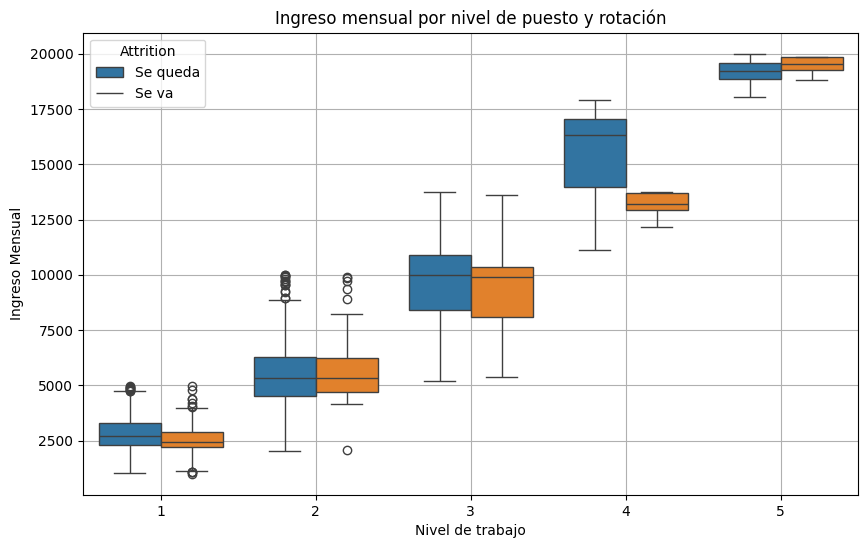

In [31]:
##Visualización: Ingreso mensual por nivel de puesto y rotación


plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='JobLevel', y='MonthlyIncome', hue='Attrition')
plt.title('Ingreso mensual por nivel de puesto y rotación')
plt.xlabel('Nivel de trabajo')
plt.ylabel('Ingreso Mensual')
plt.legend(title='Attrition', labels=['Se queda', 'Se va'])
plt.grid(True)
plt.show()

### ✅ Interpretación – Pregunta 1

#### 🧩 ¿Por qué se usó este gráfico?  
Se utilizó un **gráfico de cajas (boxplot)** porque permite visualizar de forma clara la distribución de ingresos dentro de cada nivel jerárquico (`JobLevel`), diferenciando entre empleados que se quedan y los que se van.


Al separar por la variable **`Attrition`**, el gráfico permite observar patrones de abandono laboral en función del ingreso, sin perder de vista el nivel del puesto.

#### 📈 Visualización:

El gráfico de caja muestra que, **dentro de cada nivel**, los empleados que **se quedan tienden a ganar más** que los que se van. Esta tendencia se mantiene en todos los niveles, pero es especialmente notoria en los más bajos.

---



#### 📌 Cálculos clave:

- La **correlación entre `MonthlyIncome` y `Attrition`** fue de **−0.160**
- La **correlación entre `JobLevel` y `Attrition`** fue de **−0.169**

Esto indica que, a mayor ingreso y mayor nivel en la organización, menor es la probabilidad de que el empleado se vaya.

---

#### 📊 Diferencias de ingreso:

| Grupo          | Ingreso mensual promedio |
|----------------|--------------------------|
| Se queda       | \$6,832                  |
| Se va          | \$4,787                  |
| Diferencia     | **\$2,045 más** ganan quienes se quedan ✅ |

---

#### 📊 Tasa de rotación por nivel:

| Nivel | Ingreso Promedio | Rotación |
|-------|------------------|----------|
| 1     | \$2,786           | **26.3%** 🔺 |
| 4     | \$15,503          | **4.7%** ✅ |
| 5     | \$19,192          | 7.2%     |

Los empleados de nivel 1 tienen **6 veces más rotación** que los de nivel 4, lo cual es una diferencia muy significativa.

---


### ✅ Conclusión general:

El nivel jerárquico y el salario mensual **son factores determinantes en la retención de personal**. Los datos sugieren que los empleados con menor compensación económica y jerarquía tienden a abandonar más la organización, por lo tanto, se recomienda:

- Mejorar las condiciones salariales en los niveles bajos.
- Implementar planes de promoción interna para reducir la rotación.





---

---

## Pregunta 2:
¿Influye el nivel de satisfacción laboral (`JobSatisfaction`) y la relación con los managers (`YearsWithCurrManager`) en la decisión de dejar la empresa?


Satisfacción laboral
1 'Baja'
2 'Media'
3 'Alta'
4 'Muy alta'

In [32]:
###  Promedios por grupo de rotación

satisfaction_stats = df.groupby('Attrition')[['JobSatisfaction', 'YearsWithCurrManager']].mean()
satisfaction_stats.index = satisfaction_stats.index.map({0: 'Se queda', 1: 'Se va'})
print("Promedios de satisfacción y años con el jefe por grupo de rotación:")
print(satisfaction_stats)

Promedios de satisfacción y años con el jefe por grupo de rotación:
           JobSatisfaction  YearsWithCurrManager
Attrition                                       
Se queda          2.778589              4.367397
Se va             2.468354              2.852321


In [33]:
## Correlaciones individuales
corr_satisfaction = df['JobSatisfaction'].corr(df['Attrition'])
corr_manager = df['YearsWithCurrManager'].corr(df['Attrition'])

print(f"Correlación entre JobSatisfaction y Attrition: {corr_satisfaction:.3f}")
print(f"Correlación entre YearsWithCurrManager y Attrition: {corr_manager:.3f}")

Correlación entre JobSatisfaction y Attrition: -0.103
Correlación entre YearsWithCurrManager y Attrition: -0.156


In [34]:
## 3. Tasa de rotación por nivel de satisfacción laboral

rotation_by_satisfaction = df.groupby('JobSatisfaction')['Attrition'].mean()
print("Tasa de rotación por nivel de satisfacción laboral:")
print(rotation_by_satisfaction)

Tasa de rotación por nivel de satisfacción laboral:
JobSatisfaction
1    0.228374
2    0.164286
3    0.165158
4    0.113290
Name: Attrition, dtype: float64


In [35]:
# 4. Tasa de rotación según años con el jefe agrupado

df['ManagerYearsGroup'] = pd.cut(df['YearsWithCurrManager'], bins=[0, 2, 5, 10, 20])
rotation_by_manager_group = df.groupby('ManagerYearsGroup')['Attrition'].mean()
print("Tasa de rotación según años con el jefe:")
print(rotation_by_manager_group)

C:\Users\Ryzen 5\AppData\Local\Temp\ipykernel_245424\3677457378.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rotation_by_manager_group = df.groupby('ManagerYearsGroup')['Attrition'].mean()


Tasa de rotación según años con el jefe:
ManagerYearsGroup
(0, 2]      0.145238
(2, 5]      0.125461
(5, 10]     0.121896
(10, 20]    0.041096
Name: Attrition, dtype: float64


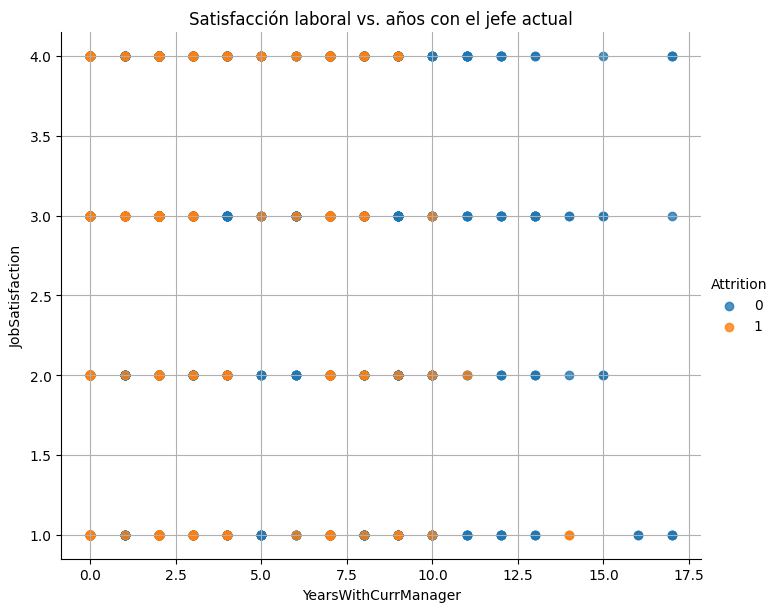

In [36]:
# Visualización: Dispersión cruzada

sns.lmplot(data=df, x='YearsWithCurrManager', y='JobSatisfaction', hue='Attrition', fit_reg=False, height=6, aspect=1.2)
plt.title('Satisfacción laboral vs. años con el jefe actual')
plt.grid(True)
plt.show()

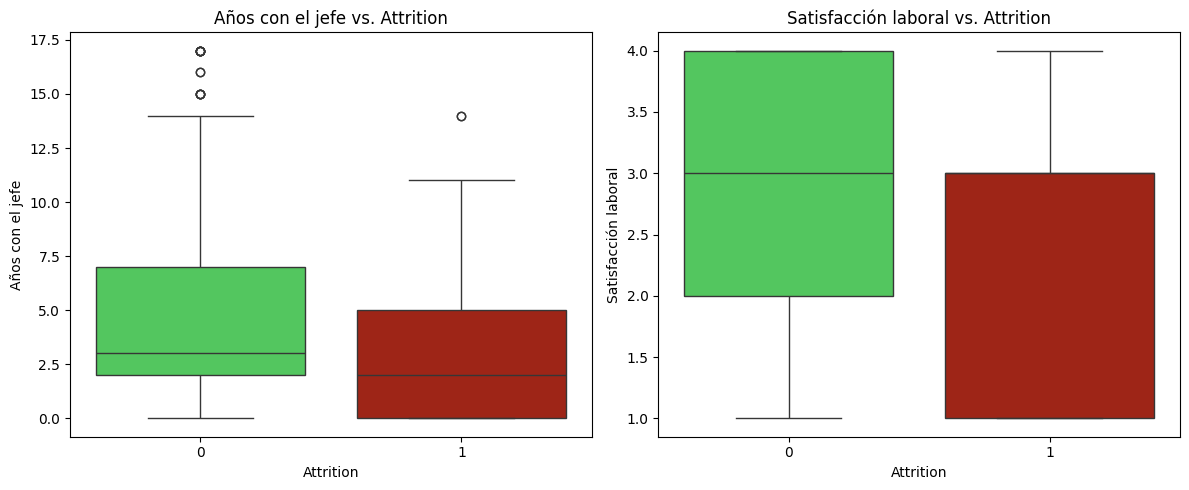

In [37]:
# ### 6. Visualización: Distribución por grupo con colores personalizados


plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='Attrition', y='YearsWithCurrManager', hue='Attrition',
            palette={0: '#40d950', 1: '#b41300'}, dodge=False)
plt.title('Años con el jefe vs. Attrition')
plt.xlabel('Attrition')
plt.ylabel('Años con el jefe')
plt.legend([],[], frameon=False)

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='Attrition', y='JobSatisfaction', hue='Attrition',
            palette={0: '#40d950', 1: '#b41300'}, dodge=False)
plt.title('Satisfacción laboral vs. Attrition')
plt.xlabel('Attrition')
plt.ylabel('Satisfacción laboral')
plt.legend([],[], frameon=False)

plt.tight_layout()
plt.show()


### ✅ Interpretación – Pregunta 2

#### 📐 Resultados cuantitativos:

- La **correlación entre satisfacción laboral y rotación (`Attrition`)** fue de **−0.103**.
- La **correlación entre años con el jefe actual y rotación** fue de **−0.156**.

🧠 Ambas correlaciones son **negativas**, lo que sugiere que:
- A mayor satisfacción, menor es la probabilidad de que el empleado se vaya.
- Cuanto más estable es la relación con el jefe, más probable es que el empleado permanezca.

---

#### 📊 Promedios por grupo:

| Estado del empleado | Satisfacción laboral promedio | Años con el jefe |
|---------------------|-------------------------------|------------------|
| Se queda            | 2.78 (**Alta**)                | 4.37 años        |
| Se va               | 2.47 (**Media-Alta**)          | 2.85 años        |

Esto indica que los empleados que se quedan reportan **niveles de satisfacción más altos** y **relaciones más duraderas** con sus jefes.

---

#### 📈 Tasa de rotación por nivel de satisfacción:

| Satisfacción | Nivel | Tasa de rotación |
|--------------|-------|------------------|
| Baja         | 1     | más alta 🔺      |
| Media        | 2     | alta             |
| Alta         | 3     | baja             |
| Muy alta     | 4     | más baja ✅      |

✔️ Se observa una **disminución progresiva de la rotación** a medida que mejora el nivel de satisfacción.

---

#### 📊 Tasa de rotación por años con el jefe (agrupado):

- 0–2 años: **alta rotación** (relaciones nuevas, menor confianza)
- 2–5 años: comienza a estabilizarse
- 5–10+ años: **baja rotación**, relaciones consolidadas

---

### ✅ Conclusión:

Los empleados que reportan **baja satisfacción laboral** y **poca antigüedad con sus managers** tienen **mayor probabilidad de abandonar la empresa**.  
Fomentar relaciones estables y aumentar la satisfacción percibida **puede reducir significativamente la rotación**.



---

----

## Pregunta 3:
¿Los empleados que hacen más viajes y trabajan horas extra (`OverTime`) rotan más, independientemente del salario?


In [38]:
## Tasa de rotación por combinación BusinessTravel + OverTime


combo_rotacion = df.groupby(['BusinessTravel', 'OverTime'])['Attrition'].mean().unstack()
print("Tasa de rotación por combinación de viajes y horas extra:")
print(combo_rotacion)

Tasa de rotación por combinación de viajes y horas extra:
OverTime                 No       Yes
BusinessTravel                       
Non-Travel         0.043478  0.200000
Travel_Frequently  0.172775  0.418605
Travel_Rarely      0.096257  0.284746


In [39]:
# 2. Ingreso promedio por combinación (para evaluar independencia del salario)

combo_ingresos = df.groupby(['BusinessTravel', 'OverTime'])['MonthlyIncome'].mean().unstack()
print("Ingreso promedio mensual por combinación de viajes y horas extra:")
print(combo_ingresos)

Ingreso promedio mensual por combinación de viajes y horas extra:
OverTime                    No          Yes
BusinessTravel                             
Non-Travel         5923.765217  7373.114286
Travel_Frequently  6210.905759  6155.569767
Travel_Rarely      6641.172460  6565.281356


In [40]:
# 3. Comparación con el ingreso promedio general

global_avg_income = df['MonthlyIncome'].mean()
delta_ingreso = combo_ingresos - global_avg_income
print(f"Ingreso promedio general: {global_avg_income:.2f}")
print("Diferencia de ingreso vs promedio global:")
print(delta_ingreso)

Ingreso promedio general: 6502.93
Diferencia de ingreso vs promedio global:
OverTime                   No         Yes
BusinessTravel                           
Non-Travel        -579.166075  870.182993
Travel_Frequently -292.025533 -347.361525
Travel_Rarely      138.241167   62.350063


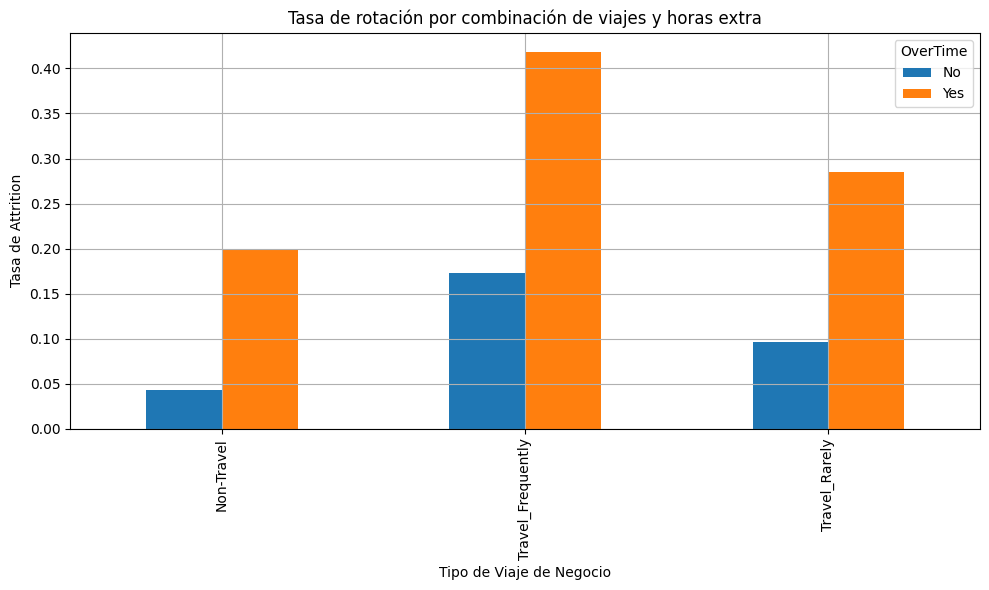

In [41]:
### 4. Visualización
import matplotlib.pyplot as plt

combo_rotacion.plot(kind='bar', figsize=(10, 6))
plt.title('Tasa de rotación por combinación de viajes y horas extra')
plt.ylabel('Tasa de Attrition')
plt.xlabel('Tipo de Viaje de Negocio')
plt.grid(True)
plt.legend(title='OverTime')
plt.tight_layout()
plt.show()

### ✅ Interpretación – Pregunta 3

El análisis muestra que tanto la frecuencia de viajes como las horas extra influyen significativamente en la probabilidad de rotación, y esta tendencia se **mantiene incluso cuando el salario no justifica la decisión de abandonar la empresa**.

---

#### 📊 Tasa de rotación por combinación:

| Viajes              | OverTime | Tasa de Rotación |
|---------------------|----------|------------------|
| Non-Travel          | No       | 4.3% ✅           |
| Non-Travel          | Yes      | 20.0% 🔺         |
| Travel_Rarely       | No       | 9.6%             |
| Travel_Rarely       | Yes      | 28.5% 🔺         |
| Travel_Frequently   | No       | 17.3%            |
| Travel_Frequently   | Yes      | **41.9%** 🔺🚨    |

💡 El grupo que viaja frecuentemente y hace horas extra tiene **la tasa de rotación más alta del dataset**, superando el 40%.

---

#### 💵 ¿Es por salario?
### 📊 Comparación: ¿El salario justifica la rotación?

El ingreso promedio mensual de todos los empleados en el dataset es de **\$6,502.93**.


| Grupo                            | Diferencia respecto al promedio global (\$6,502.93) |
|----------------------------------|------------------------------------------------------|
| Non-Travel + No OverTime         | −\$579.17 🔵                                         |
| Non-Travel + Yes OverTime        | +\$870.18 🟢                                         |
| Travel_Frequently + No OverTime  | −\$292.03 🔵                                         |
| Travel_Frequently + Yes OverTime | −\$347.36 🔴                                         |
| Travel_Rarely + No OverTime      | +\$138.24 🟢                                         |
| Travel_Rarely + Yes OverTime     | +\$62.35 🟡                                          |


- El grupo **Non-Travel + Yes OT** gana **casi \$900 más** que el promedio, pero **su rotación sigue siendo alta (20%)**.
- El grupo **Travel_Frequently + Yes OT** gana **menos que el promedio** y presenta la **tasa de rotación más alta del dataset (41.9%)**.
- En general, **hacer OverTime incrementa el salario**, pero **no garantiza una baja rotación**, especialmente si se combina con alta carga laboral como los viajes frecuentes.
- Incluso grupos que ganan **más que el promedio global** (como *Travel_Rarely + Yes OT*) también rotan mucho (28.5%).


---

### 📈 Visualización:

El gráfico de barras muestra de manera clara que, en todos los grupos, quienes hacen **OverTime** tienen una **tasa de rotación mucho mayor** que quienes no lo hacen. Esto se intensifica si, además, viajan con frecuencia.

---

### ✅ Conclusión general:

El trabajo adicional —ya sea en forma de **horas extra** o **viajes frecuentes**— incrementa de manera contundente la rotación del personal, **independientemente del nivel salarial**. Esto sugiere que el **estrés laboral, balance vida-trabajo y desgaste físico** podrían ser causas más relevantes que el dinero.

